<a href="https://colab.research.google.com/github/saranyapalani/project/blob/master/chen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
import folium
import webbrowser
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/and.csv')

In [4]:
dfsmooth=df.dropna(axis=1)
dfsmooth.isna().sum()
dfsmooth=dfsmooth[1:]
print(len(dfsmooth))
df.describe().to_csv("Clean.csv")
dfsmooth.head()


332493


,CASENUM,Date,IUCR,Primary Type,Arrest,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11162428,11/28/2017 09:43:00 PM,5131,park,True,10,1158280,1886310,2017,02-11-2018 15:54,41.843778,-87.694638,"(41.843778126, -87.694637678)"
2,11175304,12-11-2017 19:15,31,park,True,12,1156092,1904769,2017,02-11-2018 15:54,41.894476,-87.702169,"(41.894475919, -87.702169158)"
3,11227287,10-08-2017 03:00,281,park,False,22,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"
4,11227583,03/28/2017 02:00:00 PM,620,park,False,8,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"
5,11227293,09-09-2017 20:17,810,park,False,3,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"


In [5]:
c1=dfsmooth.columns.tolist()
dfsmooth=dfsmooth[c1[1:]]
dfsmooth.head()

,Date,IUCR,Primary Type,Arrest,District,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1,11/28/2017 09:43:00 PM,5131,park,True,10,1158280,1886310,2017,02-11-2018 15:54,41.843778,-87.694638,"(41.843778126, -87.694637678)"
2,12-11-2017 19:15,31,park,True,12,1156092,1904769,2017,02-11-2018 15:54,41.894476,-87.702169,"(41.894475919, -87.702169158)"
3,10-08-2017 03:00,281,park,False,22,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"
4,03/28/2017 02:00:00 PM,620,park,False,8,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"
5,09-09-2017 20:17,810,park,False,3,1170736,1827003,2017,02-11-2018 15:57,41.894476,-87.619099,"(41.894475919, -87.702169158)"


In [6]:
dfarr=np.array(dfsmooth['Primary Type'])
dfu=np.unique(dfarr)
dfkey=np.unique(np.array(np.array(dfsmooth['Primary Type'])))
dfval=np.array(dfsmooth['Primary Type'].value_counts().values)
print(dfu[:8])
print(dfval[:8])


['appartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[102474  64879  53174  41958  36797  33211]


<BarContainer object of 6 artists>

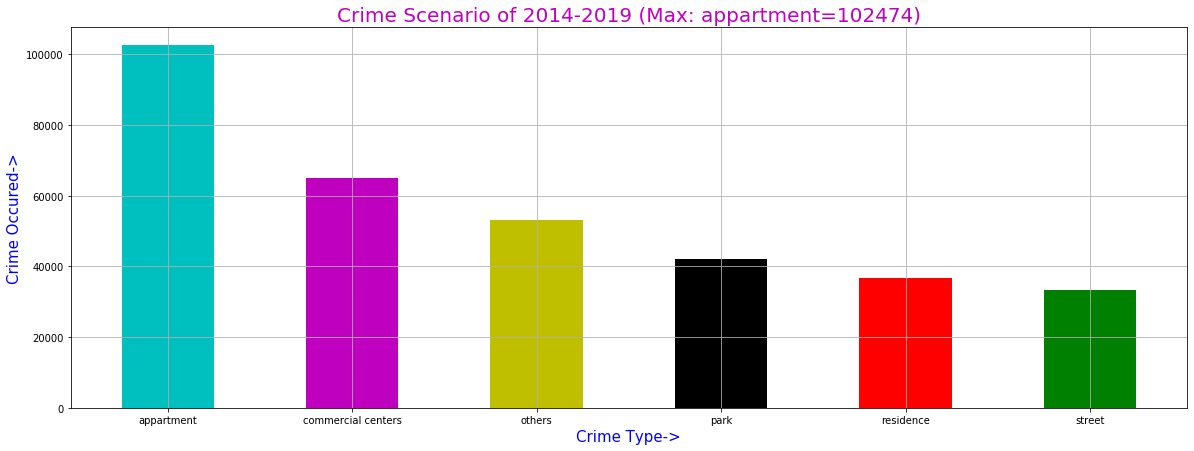

In [8]:
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2014-2019 (Max: {}={})".format(dfu[:8][0],dfval[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(dfu[:8],dfval[:8],color=color,width=0.5)


['appartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[436 300 272 164 125 124]


<BarContainer object of 6 artists>

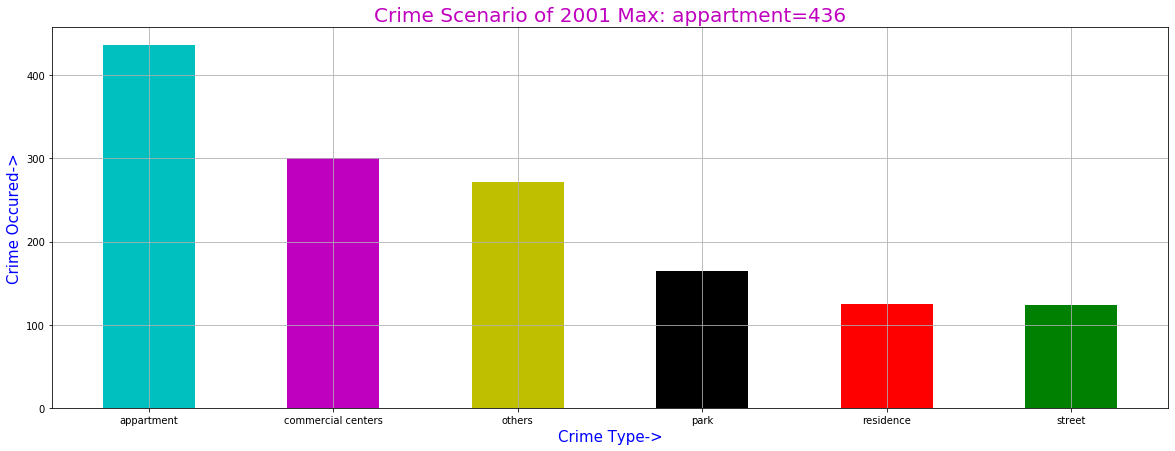

In [9]:
c01=dfsmooth[dfsmooth['Year']==2014]
c01=c01[c01.columns.tolist()[1:]]
c01.head()
c01arr=np.array(c01['Primary Type'])
c01u=np.unique(c01arr)
c01key=np.unique(np.array(np.array(c01['Primary Type'])))
c01val=np.array(c01['Primary Type'].value_counts().values)
print(c01u[:8])
print(c01val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c01u[:8][0],c01val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c01u[:8],c01val[:8],color=color,width=0.5)



['appartment' 'commercial centers' 'others' 'park' 'residence' 'street']
[102310  54273  52992  41044  30456  22629]


<BarContainer object of 6 artists>

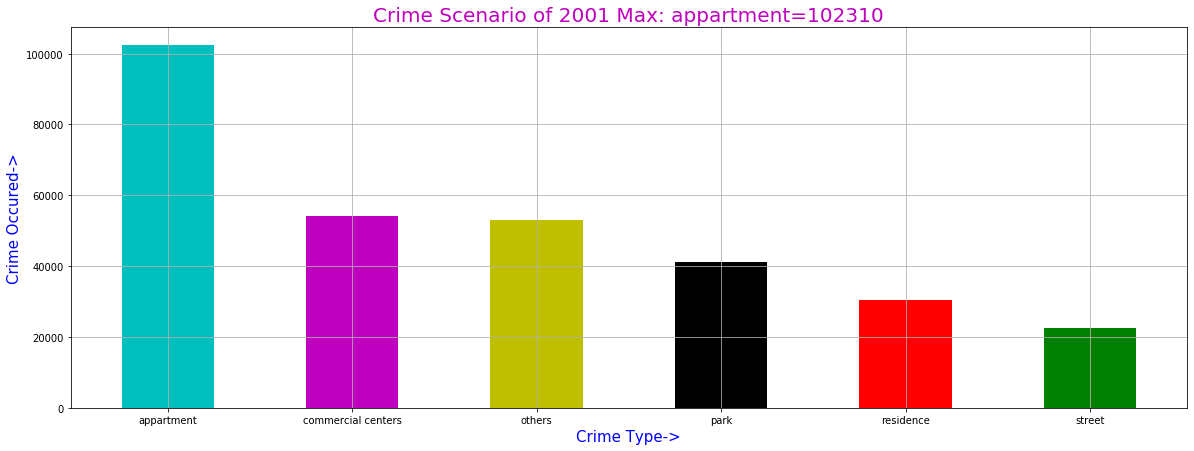

In [10]:
c02=dfsmooth[dfsmooth['Year']==2015]
c02=c02[c02.columns.tolist()[1:]]
c02.head()
c02arr=np.array(c02['Primary Type'])
c02u=np.unique(c02arr)
c02key=np.unique(np.array(np.array(c02['Primary Type'])))
c02val=np.array(c02['Primary Type'].value_counts().values)
print(c02u[:8])
print(c02val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c02u[:8][0],c02val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c02u[:8],c02val[:8],color=color,width=0.5)



['appartment' 'commercial centers' 'others' 'park' 'street']
[1530  228  154    6    3]


<BarContainer object of 5 artists>

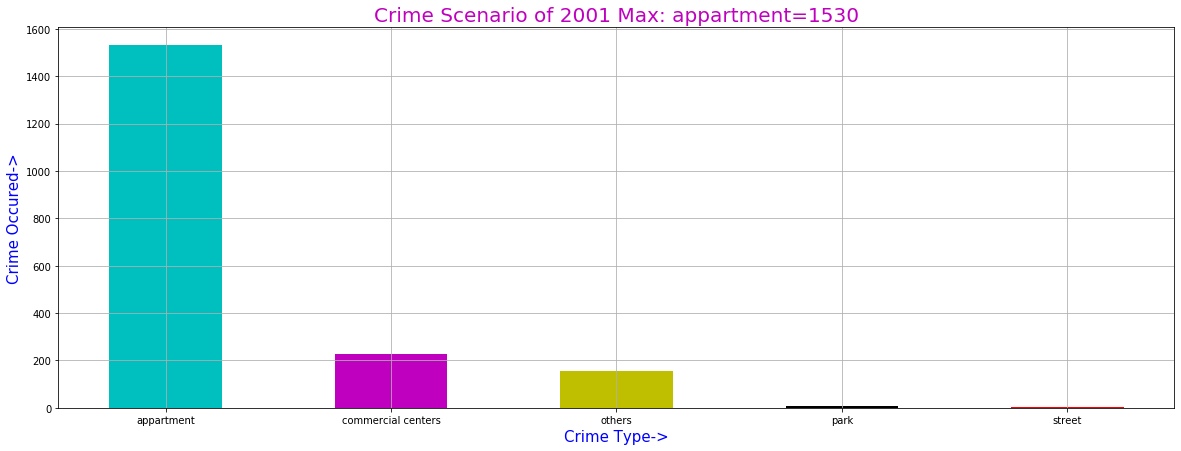

In [11]:
c03=dfsmooth[dfsmooth['Year']==2016]
c03=c03[c03.columns.tolist()[1:]]
c03.head()
c03arr=np.array(c03['Primary Type'])
c03u=np.unique(c03arr)
c03key=np.unique(np.array(np.array(c03['Primary Type'])))
c03val=np.array(c03['Primary Type'].value_counts().values)
print(c03u[:8])
print(c03val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c03u[:8][0],c03val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c03u[:8],c03val[:8],color=color,width=0.5)



['appartment' 'commercial centers' 'others' 'park' 'street']
[12252 10479   727   201    27]


<BarContainer object of 5 artists>

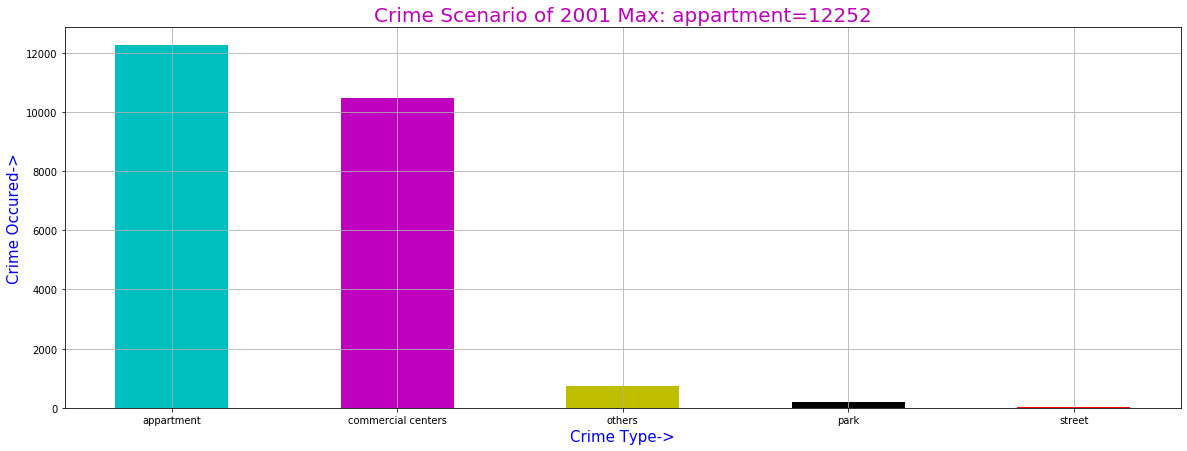

In [12]:
c04=dfsmooth[dfsmooth['Year']==2017]
c04=c04[c04.columns.tolist()[1:]]
c04.head()
c04arr=np.array(c04['Primary Type'])
c04u=np.unique(c04arr)
c04key=np.unique(np.array(np.array(c04['Primary Type'])))
c04val=np.array(c04['Primary Type'].value_counts().values)
print(c04u[:8])
print(c04val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c04u[:8][0],c04val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c04u[:8],c04val[:8],color=color,width=0.5)



['commercial centers' 'others' 'park' 'street']
[1404  183   49   21]


<BarContainer object of 4 artists>

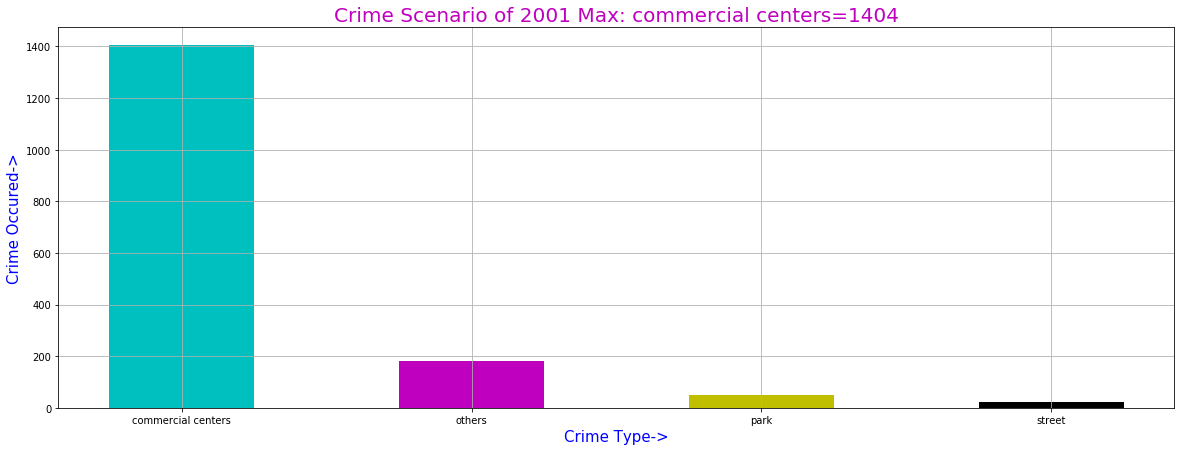

In [13]:
c05=dfsmooth[dfsmooth['Year']==2018]
c05=c05[c05.columns.tolist()[1:]]
c05.head()
c05arr=np.array(c05['Primary Type'])
c05u=np.unique(c05arr)
c05key=np.unique(np.array(np.array(c05['Primary Type'])))
c05val=np.array(c05['Primary Type'].value_counts().values)
print(c05u[:8])
print(c05val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c05u[:8][0],c05val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c05u[:8],c05val[:8],color=color,width=0.5)



['commercial centers' 'others' 'park' 'street']
[37 34 30  3]


<BarContainer object of 4 artists>

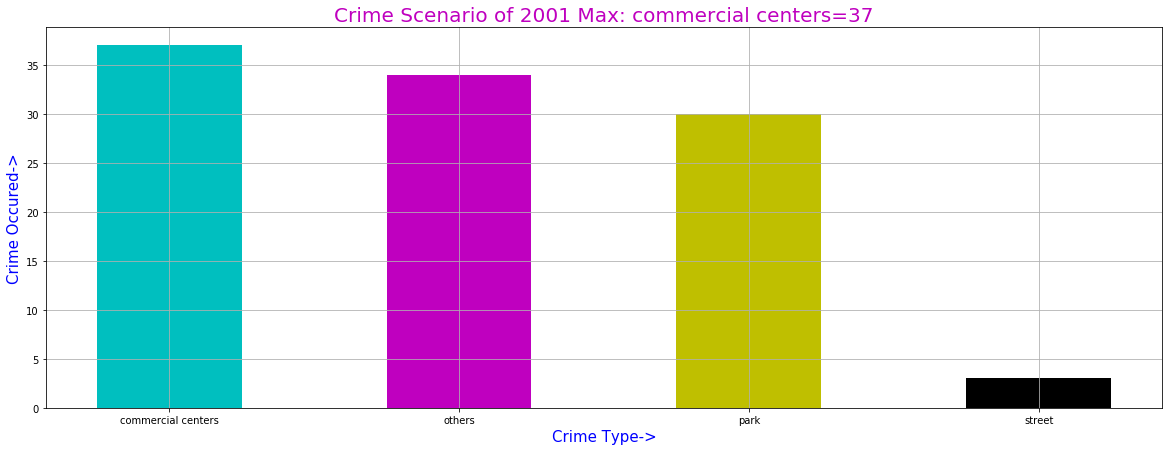

In [14]:
c06=dfsmooth[dfsmooth['Year']==2019]
c06=c06[c06.columns.tolist()[1:]]
c06.head()
c06arr=np.array(c06['Primary Type'])
c06u=np.unique(c06arr)
c06key=np.unique(np.array(np.array(c06['Primary Type'])))
c06val=np.array(c06['Primary Type'].value_counts().values)
print(c06u[:8])
print(c06val[:8])
color='cmykrgb'
plt.figure(figsize=(20,7))
plt.title("Crime Scenario of 2001 Max: {}={}".format(c06u[:8][0],c06val[:8][0]),fontsize=20,color='m')
plt.xlabel("Crime Type->",fontsize=15,color='b')
plt.ylabel("Crime Occured->",fontsize=15,color='b')
plt.grid()
plt.bar(c06u[:8],c06val[:8],color=color,width=0.5)



In [0]:
arrestfalse=[] #not_arrested_list
arrestratiofalse=[] #not_arrested_ratio
arrestratiotrue=[] #arrested_ratio


In [20]:
c01arreststat=c01.groupby(['Arrest']).count()['IUCR'].keys().tolist() #arrest_statistics_representing_true_false
c01arrestcount=c01.groupby(['Arrest']).count()['IUCR'].values.tolist() #arrest_count_no_of_true_or_false
print(c01arreststat)
print(c01arrestcount)


[False, True]
[958, 463]


In [17]:
arrestfalse.append(c01arrestcount[0])
arrestratiofalse.append((c01arrestcount[0]/sum(c01arrestcount))*100)
arrestratiotrue.append((c01arrestcount[1]/sum(c01arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)


[958]
[67.41731175228712]
[32.58268824771287]


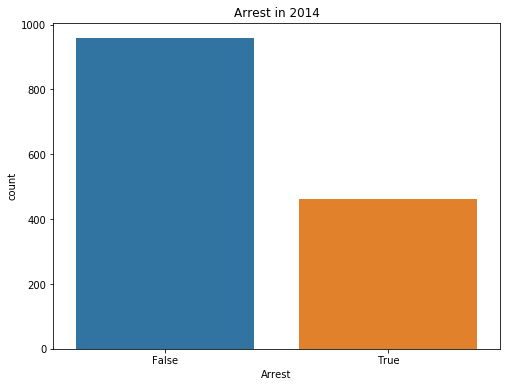

In [18]:
plt.figure(figsize=(8,6))
plt.title("Arrest in 2014")
sns.countplot(c01['Arrest'])


In [21]:
c02arreststat=c02.groupby(['Arrest']).count()['IUCR'].keys().tolist()
c02arrestcount=c02.groupby(['Arrest']).count()['IUCR'].values.tolist()
print(c02arreststat)
print(c02arrestcount)

[False, True]
[213935, 89769]


[958, 213935]
[67.41731175228712, 70.44194347127466]
[32.58268824771287, 29.55805652872534]


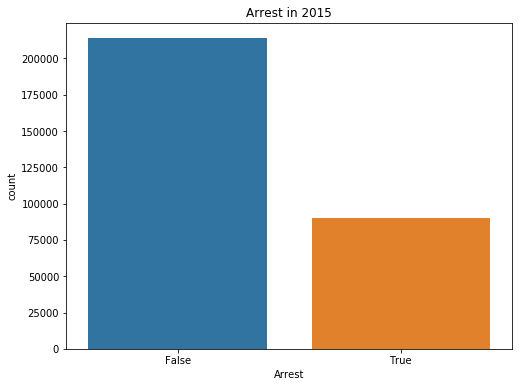

In [22]:
arrestfalse.append(c02arrestcount[0])
arrestratiofalse.append((c02arrestcount[0]/sum(c02arrestcount))*100)
arrestratiotrue.append((c02arrestcount[1]/sum(c02arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2015")
sns.countplot(c02['Arrest'])


[False, True]
[1527, 394]
[958, 213935, 1527]
[67.41731175228712, 70.44194347127466, 79.48984903695991]
[32.58268824771287, 29.55805652872534, 20.510150963040083]


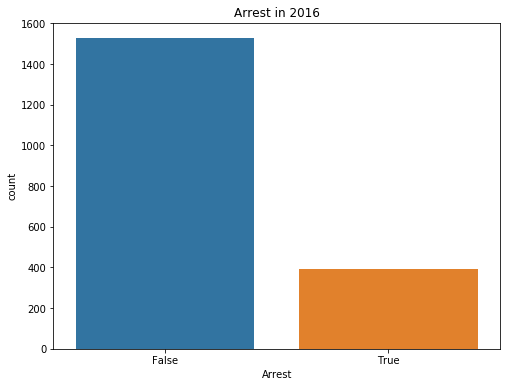

In [23]:
c03arreststat=c03.groupby(['Arrest']).count()['IUCR'].keys().tolist()
c03arrestcount=c03.groupby(['Arrest']).count()['IUCR'].values.tolist()
print(c03arreststat)
print(c03arrestcount)
arrestfalse.append(c03arrestcount[0])
arrestratiofalse.append((c03arrestcount[0]/sum(c03arrestcount))*100)
arrestratiotrue.append((c03arrestcount[1]/sum(c03arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2016")
sns.countplot(c03['Arrest'])



[False, True]
[18884, 4802]
[958, 213935, 1527, 18884]
[67.41731175228712, 70.44194347127466, 79.48984903695991, 79.72642067043823]
[32.58268824771287, 29.55805652872534, 20.510150963040083, 20.273579329561766]


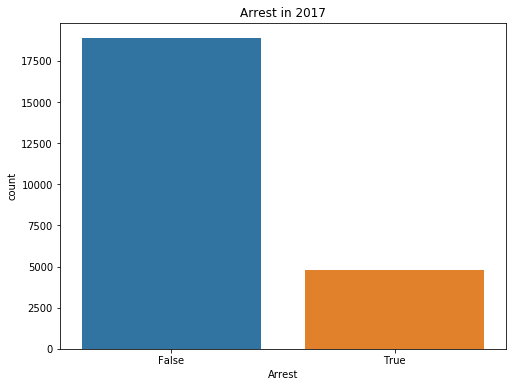

In [24]:
c04arreststat=c04.groupby(['Arrest']).count()['IUCR'].keys().tolist()
c04arrestcount=c04.groupby(['Arrest']).count()['IUCR'].values.tolist()
print(c04arreststat)
print(c04arrestcount)
arrestfalse.append(c04arrestcount[0])
arrestratiofalse.append((c04arrestcount[0]/sum(c04arrestcount))*100)
arrestratiotrue.append((c04arrestcount[1]/sum(c04arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c04['Arrest'])



[False, True]
[1291, 366]
[958, 213935, 1527, 18884, 1291]
[67.41731175228712, 70.44194347127466, 79.48984903695991, 79.72642067043823, 77.91188895594448]
[32.58268824771287, 29.55805652872534, 20.510150963040083, 20.273579329561766, 22.088111044055523]


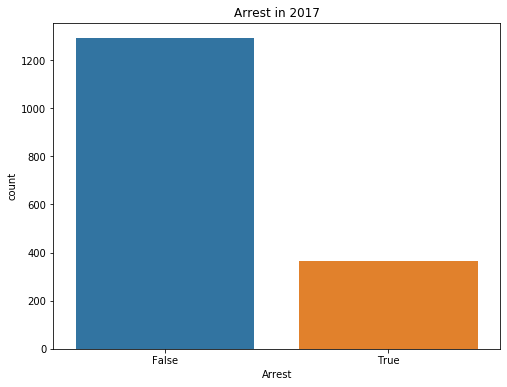

In [25]:
c05arreststat=c05.groupby(['Arrest']).count()['IUCR'].keys().tolist()
c05arrestcount=c05.groupby(['Arrest']).count()['IUCR'].values.tolist()
print(c05arreststat)
print(c05arrestcount)
arrestfalse.append(c05arrestcount[0])
arrestratiofalse.append((c05arrestcount[0]/sum(c05arrestcount))*100)
arrestratiotrue.append((c05arrestcount[1]/sum(c05arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2017")
sns.countplot(c05['Arrest'])



[False, True]
[98, 6]
[958, 213935, 1527, 18884, 1291, 98]
[67.41731175228712, 70.44194347127466, 79.48984903695991, 79.72642067043823, 77.91188895594448, 94.23076923076923]
[32.58268824771287, 29.55805652872534, 20.510150963040083, 20.273579329561766, 22.088111044055523, 5.769230769230769]


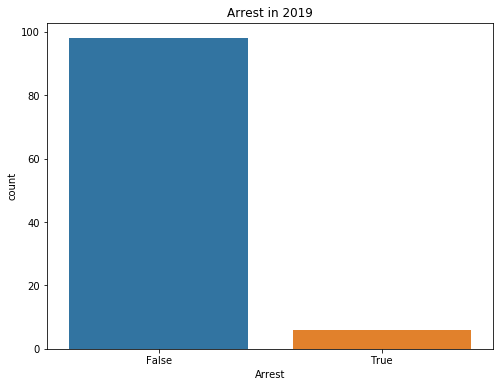

In [26]:
c06arreststat=c06.groupby(['Arrest']).count()['IUCR'].keys().tolist()
c06arrestcount=c06.groupby(['Arrest']).count()['IUCR'].values.tolist()
print(c06arreststat)
print(c06arrestcount)
arrestfalse.append(c06arrestcount[0])
arrestratiofalse.append((c06arrestcount[0]/sum(c06arrestcount))*100)
arrestratiotrue.append((c06arrestcount[1]/sum(c06arrestcount))*100)
print(arrestfalse)
print(arrestratiofalse)
print(arrestratiotrue)
plt.figure(figsize=(8,6))
plt.title("Arrest in 2019")
sns.countplot(c06['Arrest'])



In [43]:
print(len(arrestfalse))
print(len(arrestratiofalse))
print(len(arrestratiotrue))
yearlist=[str(i) for i in range(2014,2020)]
print(yearlist)

6
6
6
['2014', '2015', '2016', '2017', '2018', '2019']


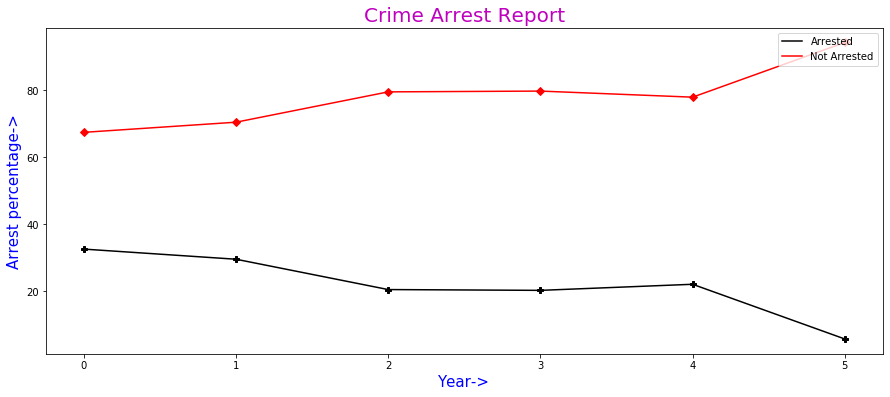

In [44]:
plt.figure(figsize=(15,6))
plt.title("Crime Arrest Report",fontsize=20,color='m')
plt.xlabel("Year->",fontsize=15,color='b')
plt.ylabel("Arrest percentage->",fontsize=15,color='b')
plt.plot(arrestratiotrue,"k",label="Arrested")
plt.plot(arrestratiotrue,"Pk")
plt.plot(arrestratiofalse,"r",label="Not Arrested")
plt.plot(arrestratiofalse,"Dr")
plt.legend(loc="upper right")


In [45]:
arresttrue=[c01arrestcount[1],c02arrestcount[1],c03arrestcount[1],c04arrestcount[1],c05arrestcount[1],c06arrestcount[1]]
print(arresttrue)
print(len(arresttrue))


[463, 89769, 394, 4802, 366, 6]
6


In [46]:
prob=[]
previous=arrestratiotrue[0]
for i in range(len(arrestratiotrue)):
    if previous>=arrestratiotrue[i]:
        prob.append(0)
    else:
        prob.append(1)
    previous=arrestratiotrue[i]
print(prob)


[0, 0, 0, 0, 1, 0]


In [47]:
ratio=[]
for i in range(len(arrestratiotrue)):
    ratio.append(arresttrue[i]/(arrestfalse[i]+arresttrue[i]))
print(ratio)


[0.32582688247712877, 0.2955805652872534, 0.20510150963040083, 0.20273579329561767, 0.22088111044055522, 0.057692307692307696]


In [0]:
regdata=pd.DataFrame({
    "Year":yearlist,
    "Cases Booked":np.array(arrestfalse)+np.array(arresttrue),
    "Not Arrested":arrestfalse,
    "Arrested":arresttrue,
    "Arrested(%)":arrestratiotrue,
    "Not Arrested(%)":arrestratiofalse,
    "Efficiency Ratio":ratio,
    "Crime Hike":prob
})
regdata.to_csv("regdata.csv")


In [50]:
regdata.head()

,Year,Cases Booked,Not Arrested,Arrested,Arrested(%),Not Arrested(%),Efficiency Ratio,Crime Hike
0,2014,1421,958,463,32.582688,67.417312,0.325827,0
1,2015,303704,213935,89769,29.558057,70.441943,0.295581,0
2,2016,1921,1527,394,20.510151,79.489849,0.205102,0
3,2017,23686,18884,4802,20.273579,79.726421,0.202736,0
4,2018,1657,1291,366,22.088111,77.911889,0.220881,1


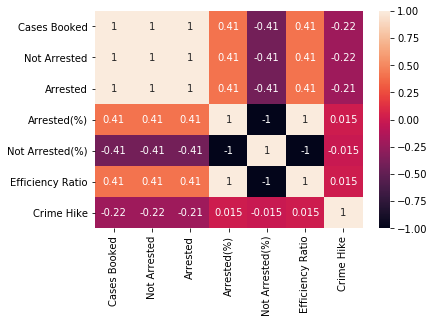

In [51]:
sns.heatmap(regdata.corr(),annot=True)

In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()
logmodel.fit(regdata[regdata.columns.tolist()[1:len(regdata.columns.tolist())-1]],regdata[regdata.columns.tolist()[-1]])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
meanrat=np.mean(np.array(regdata['Efficiency Ratio']))


In [67]:
#no of cases booked = bookcase
#not arrested = bookcase-bookcase*meanrat
#arrested = bookcase*meanrat
#arrested % = bookcase*meanrat/bookcase
#not arrested % = bookcase-(bookcase*meanrat/bookcase)
#efficiency ratio = meanrat
bookcase=int(input("Please enter probable number of cases booked: "))
predict_crime=logmodel.predict([[bookcase,bookcase-bookcase*meanrat,bookcase*meanrat,bookcase*meanrat/bookcase,bookcase-(bookcase*meanrat/bookcase),meanrat]])
print(predict_crime[0])
if predict_crime[0]==0:
    print("Crime rate in Chennai will decrease...")
else:
    print("Crime rate in Chennai will increase...")


Please enter probable number of cases booked: 99
0
Crime rate in Chennai will decrease...
